# Visualization based on the relationships implied by the model

In [6]:
# Add 'graph' environment to PATH
import sys
sys.path.append('/home/ski/anaconda3/envs/graph/lib/python3.8/site-packages')

# User defined functions
import base_methods
from base_methods import load_the_csvs
import graph_methods
from graph_methods import network_by_date, load_vertices, find_p1_affiliations, load_edges, make_graph
import feature_methods
from feature_methods import feature_creation, add_pagerank, add_weighted_pagerank, add_shortest_path
from feature_methods import add_weighted_shortest_path, add_kcore, add_degree, add_triangle
from feature_methods import update_pagerank_weight, update_pagerank_reset_prob, update_pagerank_prev_to_current
from feature_methods import sum_weight, make_pagerank_zero, update_l1_delta, normalize_weight, pagerank_weighted

# Import data analysis packages
import numpy as np
import pandas as pd
import csv
import warnings
import os
import time
import math
from importlib import reload
from functools import reduce
from datetime import datetime
warnings.filterwarnings('ignore')

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
sns.set(font_scale=1.3)
sns.set_style("white") 

# Graph
import networkx as nx
from pyvis.network import Network
import turicreate
from turicreate import pagerank, kcore, degree_counting, shortest_path, connected_components, triangle_counting
from turicreate import SFrame, SGraph, SArray, load_sgraph, aggregate 

## Loading SFrames

In [7]:
# Loading SFrames
lst_of_frames = []
for val in ['cb','p1']:
    lst = []
    for idx in range(12):
        lst.append(SFrame(data=NETWORK_SFRAMES+'{}/{}_df.csv'.format(val, idx)))
    lst_of_frames.append(lst)
cb_sframes,p1_sframes = lst_of_frames

# List of Pledge 1% uuids for sampling
p1_companies_uuid = []
p1_companies_uuid.extend(list(p1_sframes[0]['uuid'].unique()))
p1_companies_uuid.extend(list(p1_sframes[1]['uuid'].unique()))
p1_companies_uuid = list(set(p1_companies_uuid))

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/0_df.csv

Parsing completed. Parsed 100 lines in 7.16562 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 290275 lines. Lines per second: 34178

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/0_df.csv

Parsing completed. Parsed 825393 lines in 14.8987 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/1_df.csv

Parsing completed. Parsed 100 lines in 0.842095 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/1_df.csv

Parsing completed. Parsed 31499 lines in 0.474769 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/2_df.csv

Parsing completed. Parsed 100 lines in 5.78327 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 201405 lines. Lines per second: 32583.2

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/2_df.csv

Parsing completed. Parsed 453058 lines in 8.56972 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/3_df.csv

Parsing completed. Parsed 100 lines in 3.37629 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/3_df.csv

Parsing completed. Parsed 89926 lines in 2.02767 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/4_df.csv

Parsing completed. Parsed 100 lines in 6.21694 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 279332 lines. Lines per second: 54607.2

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/4_df.csv

Parsing completed. Parsed 395270 lines in 5.88228 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/5_df.csv

Parsing completed. Parsed 100 lines in 4.46623 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/5_df.csv

Parsing completed. Parsed 182483 lines in 2.89595 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/6_df.csv

Parsing completed. Parsed 100 lines in 6.09723 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 280251 lines. Lines per second: 48490.1

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/6_df.csv

Parsing completed. Parsed 483629 lines in 7.03742 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/7_df.csv

Parsing completed. Parsed 100 lines in 0.271029 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/7_df.csv

Parsing completed. Parsed 11771 lines in 0.12828 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/8_df.csv

Parsing completed. Parsed 100 lines in 6.30014 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 279276 lines. Lines per second: 51597.5

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/8_df.csv

Parsing completed. Parsed 434370 lines in 6.39665 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/9_df.csv

Parsing completed. Parsed 100 lines in 4.84227 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 138766 lines. Lines per second: 37790.1

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/9_df.csv

Parsing completed. Parsed 161382 lines in 3.82922 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/10_df.csv

Parsing completed. Parsed 100 lines in 6.43165 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 261108 lines. Lines per second: 60293.8

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/10_df.csv

Parsing completed. Parsed 289847 lines in 4.43494 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/11_df.csv

Parsing completed. Parsed 100 lines in 5.41043 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/cb/11_df.csv

Parsing completed. Parsed 225184 lines in 3.86874 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/0_df.csv

Parsing completed. Parsed 100 lines in 0.242443 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/0_df.csv

Parsing completed. Parsed 6615 lines in 0.130097 secs.

Read 100 lines. Lines per second: 1522.88

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/1_df.csv

Parsing completed. Parsed 100 lines in 0.071681 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/1_df.csv

Parsing completed. Parsed 141 lines in 0.072244 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/2_df.csv

Parsing completed. Parsed 100 lines in 0.43051 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/2_df.csv

Parsing completed. Parsed 12005 lines in 0.220643 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/3_df.csv

Parsing completed. Parsed 100 lines in 0.22243 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/3_df.csv

Parsing completed. Parsed 3628 lines in 0.118745 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/4_df.csv

Parsing completed. Parsed 100 lines in 0.33454 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/4_df.csv

Parsing completed. Parsed 11758 lines in 0.182718 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/5_df.csv

Parsing completed. Parsed 100 lines in 0.244069 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/5_df.csv

Parsing completed. Parsed 6653 lines in 0.136328 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/6_df.csv

Parsing completed. Parsed 100 lines in 0.465316 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/6_df.csv

Parsing completed. Parsed 17224 lines in 0.27976 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/7_df.csv

Parsing completed. Parsed 100 lines in 0.110239 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/7_df.csv

Parsing completed. Parsed 1460 lines in 0.103821 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/8_df.csv

Parsing completed. Parsed 100 lines in 0.728966 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/8_df.csv

Parsing completed. Parsed 25036 lines in 0.39462 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/9_df.csv

Parsing completed. Parsed 100 lines in 1.44383 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,float,float,float,str,float,str,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/9_df.csv

Parsing completed. Parsed 33517 lines in 0.775821 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/10_df.csv

Parsing completed. Parsed 100 lines in 0.487078 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/10_df.csv

Parsing completed. Parsed 13729 lines in 0.234686 secs.

Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/11_df.csv

Parsing completed. Parsed 100 lines in 0.762299 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,str,str,str,str,str,float,str,str,str,str,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jupyter/w207/crunchbase-p1-machine-learning/files/output/graph_temp/p1/11_df.csv

Parsing completed. Parsed 24993 lines in 0.415825 secs.

## Loading SGraphs
- `Cruncbase_1Way_MultiEdge`: Directed SGraph, one way, parallel edges (**MAIN GRAPH**)

- `Cruncbase_1Way_SingleEdge`: Directed SGraph, one way, **no parallel edges**

- `Crunchbase_2Ways_MultiEdge`: Directed SGraph, **two ways**, parallel edges (**WHEN NEEDED FOR FEATURE CALCULATIONS**)
    
- `Crunchbase_2Ways_SingleEdge`: Directed SGraph, two ways, **no parallel edges**
    
There here are 4 additional graphs with weights added! See complete list in code cell.

In [ ]:
# Load
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Cruncbase_1Way_MultiEdge')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Crunchbase_2Ways_MultiEdge')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Cruncbase_1Way_SingleEdge')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Crunchbase_2Ways_SingleEdge')

# With Weights
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Cruncbase_1Way_MultiEdge_Weighted')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Crunchbase_2Ways_MultiEdge_Weighted')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Cruncbase_1Way_SingleEdge_Weighted')
# cb = load_sgraph(CRUNCHBASE_GRAPHS + 'Crunchbase_2Ways_SingleEdge_Weighted')

# Visualization of Google's relationships with NetworkX graph

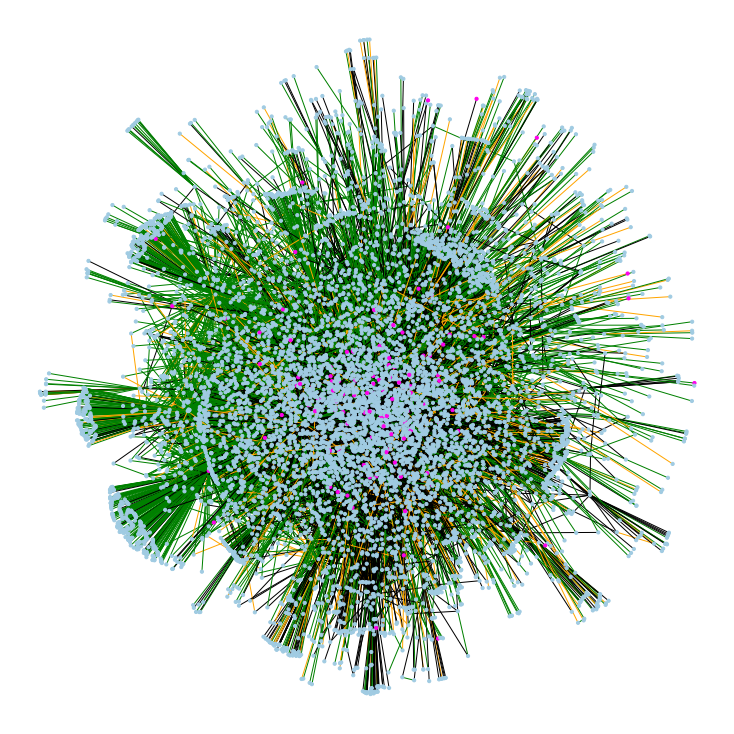

In [396]:
# ALL RELATIONSHIPS AROUND GOOGLE, STARTING FROM CRUNCHBASE NETWORK
cb = make_graph(cb_sframes, weights=False, reverse_edges=False, remove_parallel_edges=False, edges=[2,3])
cb = cb.get_neighborhood(ids='6acfa7da-1dbd-936e-d985-cf07a1b27711', radius=4, full_subgraph=True)

# Convert from turicreate to networkx
g_convert = cb
edge_fields_list = g_convert.get_edge_fields()
edges = [(row['__src_id'], row['__dst_id'], dict(list(row.items())[2:])) for row in g_convert.edges[edge_fields_list]]
vertices_fields_list = g_convert.get_vertex_fields()
nodes = [(row['__id'], dict(list(row.items())[1:])) for row in g_convert.vertices[vertices_fields_list]]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

edge_color_map = []
for edge in G.edges(data=True):
    status = edge[2]['status']
    if status == 'primary':
        edge_color_map.append('black')
    elif status == 'secondary':
        edge_color_map.append('green')
    elif status == 'tertiary':
        edge_color_map.append('orange')
    else:
        edge_color_map.append('white')

node_size_map =[]
node_color_map = []
for node in G.nodes(data=True):
    node_type = node[1]['__node_type']
    if node_type in ['company','investor']:
        if node[1]['p1_tag'] == 1:
            node_color_map.append('#ff00ec') # PINK ARE PLEDGE 1% COMPANIES
        else:
            node_color_map.append('#A0CBE2')
        node_size_map.append(10)
    elif node_type == 'person':
        node_color_map.append('#A0CBE2')
        node_size_map.append(10)
    else:
        #node_color_map.append('white')
        node_size_map.append(10)


plt.figure(figsize=(10,10)) 
pos = nx.spring_layout(G, iterations=20)
colors = range(20)
nx.draw(G, pos, node_color=node_color_map, node_size=node_size_map, edge_color=edge_color_map, width=1, with_labels=False)
plt.show()


BuIlDiNg GrApH...
- REMOVING PARALLEL EDGES


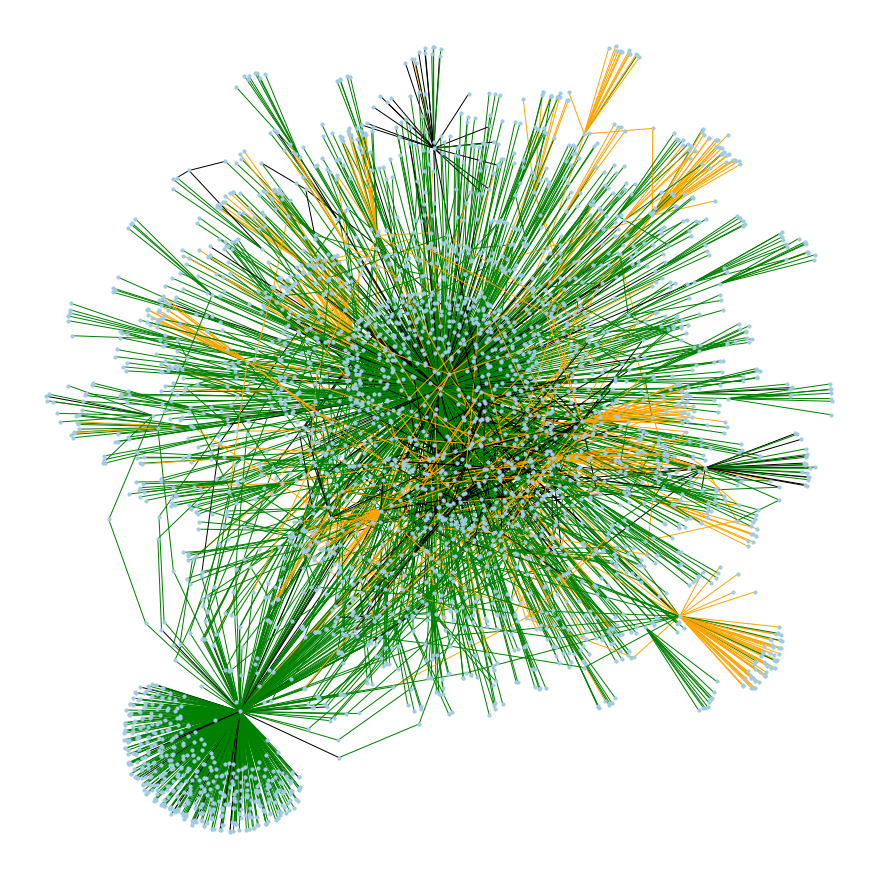

In [309]:
# ALL RELATIONSHIPS AROUND GOOGLE, STARTING FROM P1 NETWORK

# Load graph
p1 = make_graph(p1_sframes, weights=False, reverse_edges=False, remove_parallel_edges=True, edges=[2,3])

# Google neighborhood
p1 = p1.get_neighborhood(ids='6acfa7da-1dbd-936e-d985-cf07a1b27711', radius=2, full_subgraph=True)

# If you want a fancy colormap, make this before you load into networkx, creates a "color_id" on the node
#c = turicreate.graph_coloring.create(p1, verbose=False)
#c_graph = c['graph']

# Rename p1 to g .... because
g = p1

# Load into networkx
edge_fields_list = g.get_edge_fields()
edges = [(row['__src_id'], row['__dst_id'], dict(list(row.items())[2:])) for row in g.edges[edge_fields_list]]
vertices_fields_list = g.get_vertex_fields()
nodes = [(row['__id'], dict(list(row.items())[1:])) for row in g.vertices[vertices_fields_list]]
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

#### EDGE COLORMAP
edge_color_map = []
for edge in G.edges(data=True):
    status = edge[2]['status']
    if status == 'primary':
        edge_color_map.append('black')
    elif status == 'secondary':
        edge_color_map.append('green')
    elif status == 'tertiary':
        edge_color_map.append('orange')
    else:
        edge_color_map.append('white')

### YOU CAN ALSO DO SOMETHING SIMILAR FOR NODES just create a list item for each node
node_color_map = []
for node in G.nodes(data=True):
    continue
    #print(node)
    
# plot
plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, iterations=20) #CHANGE ITERATIONS TO 1 IF ITS SLOW
colors = range(20)
nx.draw(G, pos, node_color='#A0CBE2', node_size=10, edge_color=edge_color_map, width=1, with_labels=False)
plt.show()

### Get Top Investors & Partner Investors

In [109]:
import turicreate
import turicreate.aggregate as agg
pledged = p1.get_vertices(fields={'p1_tag':1})
pledgeds_uuids = list(pledged['__id'].to_numpy())

In [113]:
p1_investments = p1.get_edges(dst_ids=pledgeds_uuids, fields={'__edge_type':'investment'})
top_p1_investors = p1_investments.groupby(['__src_id','__dst_id'], operations={'count': agg.COUNT()}).sort('count', ascending=False)
top_p1_investors_nodes = p1.get_vertices(ids=list(top_p1_investors['__src_id'].to_numpy()))
top_p1_investors['__id'] = top_p1_investors['__src_id']
del top_p1_investors['__src_id'], top_p1_investors['__dst_id']
top25_co= top_p1_investors.join(top_p1_investors_nodes, on='__id', how='outer').sort('count', ascending=False).head(25)
del top25_co['__id']#, top25_co['__node_type']
top25_co.print_rows(25)

+-------+-----------------------------+-------------+--------+
| count |             name            | __node_type | p1_tag |
+-------+-----------------------------+-------------+--------+
|   16  |            Accel            |   investor  |   0    |
|   14  |           AngelPad          |   investor  |   0    |
|   13  | Frazier Technology Ventures |   investor  |   0    |
|   13  |     Andreessen Horowitz     |   investor  |   0    |
|   13  |      Ignition Partners      |   investor  |   0    |
|   13  |      Blackbird Ventures     |   investor  |   1    |
|   13  |          Threshold          |   investor  |   0    |
|   13  |  Rembrandt Venture Partners |   investor  |   0    |
|   12  |     Andreessen Horowitz     |   investor  |   0    |
|   12  |       BlueRun Ventures      |   investor  |   0    |
|   12  |    Mobius Venture Capital   |   investor  |   0    |
|   12  |          Benchmark          |   investor  |   0    |
|   12  |     Sutter Hill Ventures    |   investor  |  

In [112]:
p1_partners = p1.get_edges(dst_ids=pledgeds_uuids, fields={'__edge_type':'partner_investment'})
top_p1_partners = p1_partners.groupby(['__src_id','__dst_id'], operations={'count': agg.COUNT()}).sort('count', ascending=False)
top_p1_partners_nodes = p1.get_vertices(ids=list(top_p1_partners['__src_id'].to_numpy()))
top_p1_partners['__id'] = top_p1_partners['__src_id']
del top_p1_partners['__src_id'], top_p1_partners['__dst_id']
top25_peepz= top_p1_partners.join(top_p1_partners_nodes, on='__id', how='outer').sort('count', ascending=False).head(25)
del top25_peepz['__id'], top25_peepz['__node_type'], top25_peepz['p1_tag']
top25_peepz.print_rows(25)

+-------+-------------------+
| count |        name       |
+-------+-------------------+
|   20  | Cyril Ebersweiler |
|   14  |    Kyle Lefkoff   |
|   14  |    Bruce Booth    |
|   14  |     Gary Gigot    |
|   14  |  Jonathan Roberts |
|   14  |     Mark Solon    |
|   14  |   Andrew Braccia  |
|   14  |    Cindy Padnos   |
|   14  |    David Cohen    |
|   14  |    Thomas Korte   |
|   12  | Gerald S. Casilli |
|   12  |    Rich Barton    |
|   12  |  Jonathan Ebinger |
|   12  |   Bryan Roberts   |
|   12  |   Sunil Dhaliwal  |
|   12  |      Sam Fort     |
|   12  |  Carine Magescas  |
|   12  |    Anthony Lee    |
|   12  |     Raj Atluru    |
|   12  |   Brian O’Malley  |
|   12  |     Jim White     |
|   12  |    Ben Horowitz   |
|   12  |     Brad Feld     |
|   11  |    Peter Fenton   |
|   11  |     Josh Stein    |
+-------+-------------------+
[25 rows x 2 columns]

